In [64]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import neighbors
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

### Importing and Reading the Dataset

In [65]:
data = pd.read_csv("Downloads/autism_data.csv")

In [66]:
display(data.head(5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [68]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [69]:
# Handling missing values
data['age'].fillna(data['age'].median(), inplace=True)  # Filling missing ages with median as median is less sensitive to outliers 
                                                        # compared to the mean.

In [70]:
# Replacing '?' in categorical columns with 'Unknown'
categorical_cols = ['ethnicity', 'relation']
for col in categorical_cols:
    data[col] = data[col].replace('?', 'Unknown')

In [71]:
data.dropna(inplace=True)  #dropping missing values
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.690341,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.484593,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [72]:
# Removing unrealistic age outliers (>100 years)
data = data[data['age'] <= 100]

In [73]:
# Total number of records:
n_records = len(data.index)

# Total number of records with ASD 
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals with ASD
yes_percentage = float((n_asd_yes) / n_records * 100)

# Printing the outputs
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')
print("Percentage of individuals with ASD : {:.2f}%".format(yes_percentage))

Total number of records  : 703
Number of individuals with ASD : 189
Number of individuals without ASD : 514
Percentage of individuals with ASD : 26.88%


In [74]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  703.000000  703.000000  703.000000  703.000000  703.000000  703.000000   
mean     0.721195    0.453770    0.458037    0.496444    0.499289    0.284495   
std      0.448731    0.498213    0.498591    0.500343    0.500355    0.451495   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      result  
count  703.000000  703.000000  703.000000  703.000000  703.000000  703.000000  
mean     0.418208    0.650071    0.324324    0.574680   29.187767    4.880512  
std      

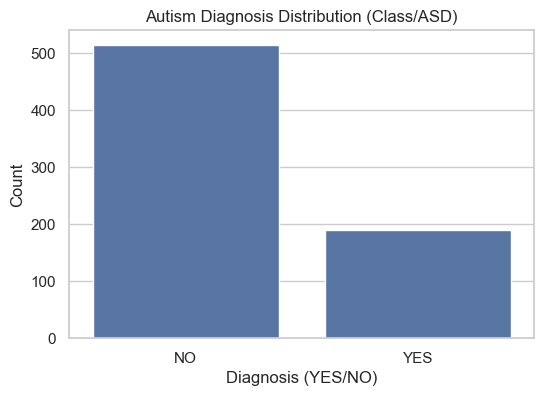

In [75]:
# Countplot for Class/ASD (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Class/ASD'])
plt.title("Autism Diagnosis Distribution (Class/ASD)")
plt.xlabel("Diagnosis (YES/NO)")
plt.ylabel("Count")
plt.show()

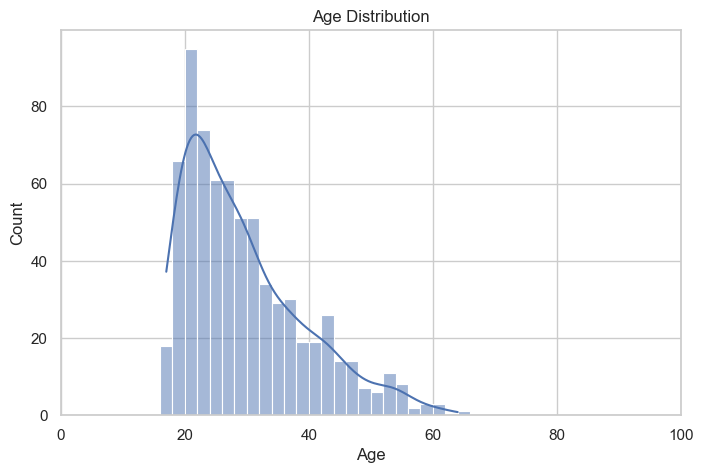

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=50, kde=True, binrange=(0, 100)) 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(0, 100)
plt.show()


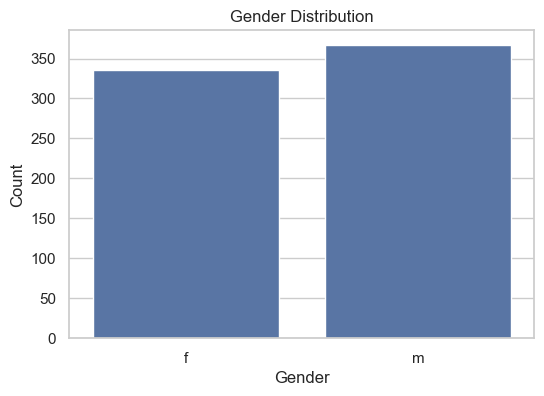

In [77]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data['gender'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [78]:
sns.set(style="whitegrid", color_codes=True)

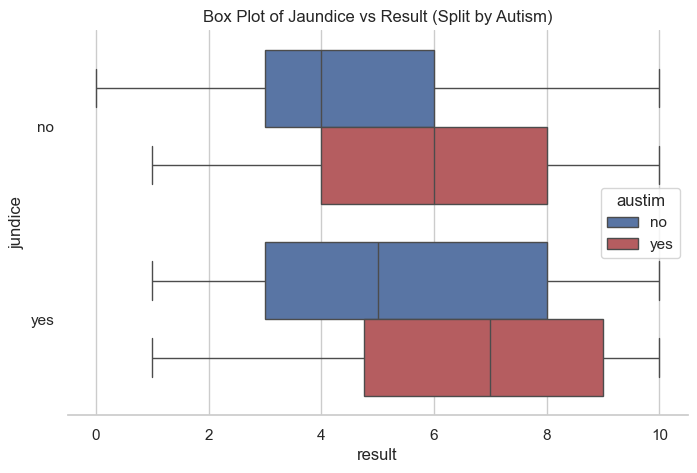

In [124]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="result",
    y="jundice",
    hue="austim",
    data=data,
    palette={'yes': "r", 'no': "b"}
)
sns.despine(left=True)
plt.title("Box Plot of Jaundice vs Result (Split by Autism)")
plt.show()


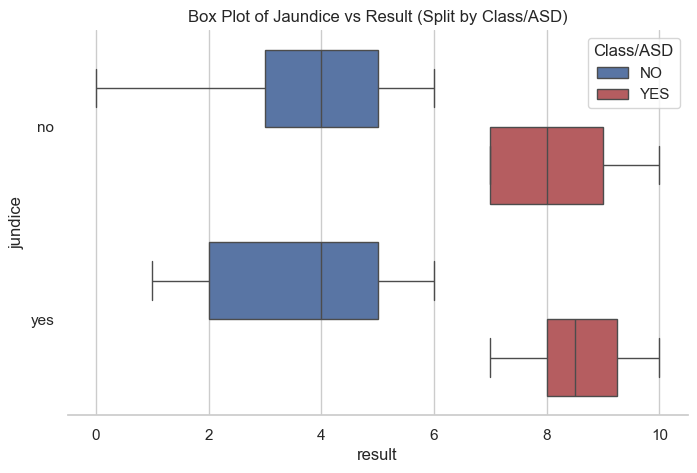

In [125]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="result",
    y="jundice",
    hue="Class/ASD",
    data=data,
    palette={'YES': "r", 'NO': "b"}
)
sns.despine(left=True)
plt.title("Box Plot of Jaundice vs Result (Split by Class/ASD)")
plt.show()


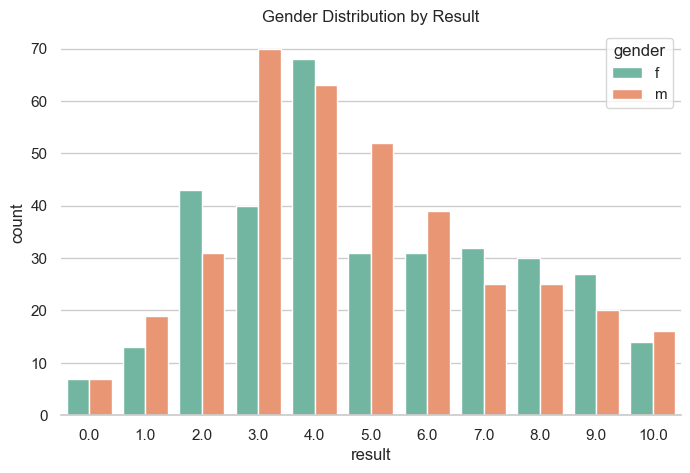

In [126]:
plt.figure(figsize=(8, 5))
sns.countplot(x="result", hue="gender", data=data, palette="Set2")
plt.title("Gender Distribution by Result")
sns.despine(left=True)
plt.show()


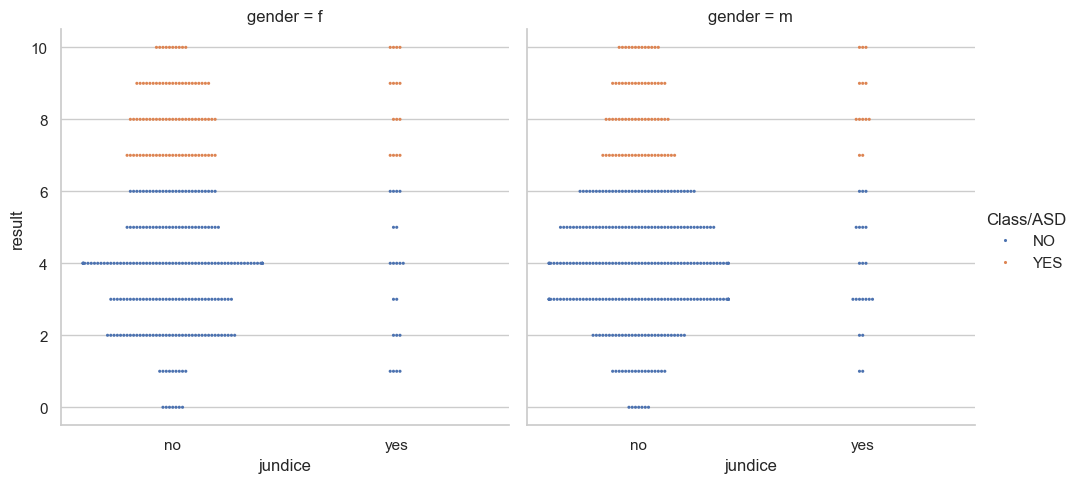

In [132]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", s = 5, col="gender", data=data, kind="swarm");

In [83]:
data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [84]:
scaler = MinMaxScaler()
num = ['age','result']
features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[num] = scaler.fit_transform(features_raw[num])

In [85]:
display(features_minmax_transform.head(5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.191489,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.148936,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.212766,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.382979,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
4,0.489362,f,Unknown,no,no,Egypt,0.2,Unknown,1,0,0,0,0,0,0,1,0,0


In [86]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

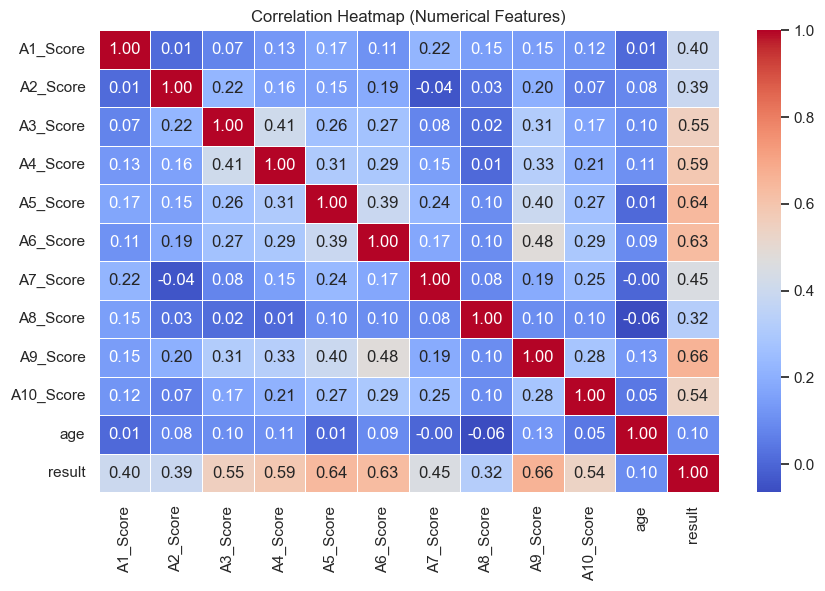

In [87]:
# Convert categorical columns to numeric values before correlation
data_numeric = data.select_dtypes(include=[np.number])  # Select only numerical columns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## One-Hot Encoding on features_minmax_transform

In [88]:
features_final = pd.get_dummies(features_minmax_transform)
features_final.head(5)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self,relation_Unknown
0,0.191489,0.6,1,1,1,1,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False
1,0.148936,0.5,1,1,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
2,0.212766,0.8,1,1,0,1,1,0,1,1,...,False,False,False,False,False,False,True,False,False,False
3,0.382979,0.6,1,1,0,1,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False
4,0.489362,0.2,1,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True


## Encode all classes data to numerical values

In [89]:
data_classes = data_raw.apply(lambda x : 1 if x == 'YES' else 0)

In [90]:
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)

103 total features after one-hot encoding
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_Unknown', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_r

Text(0, 0.5, 'Frequency')

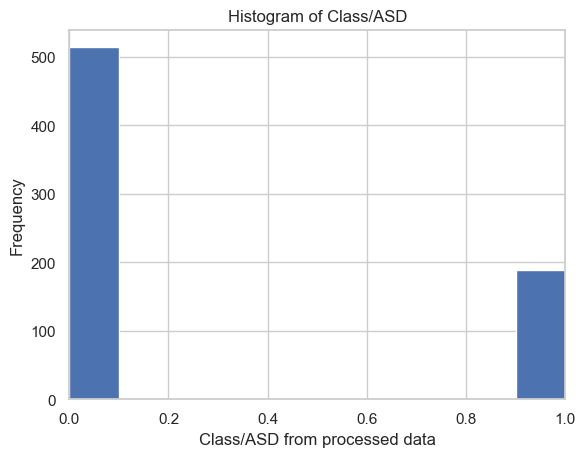

In [91]:
plt.hist(data_classes, bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

 ## Shuffle and Split the data

##### All the categorical variables have been converted to numerical variables and have been normalized, we split the data into train and test set, test set will be 20% of the total data.

In [96]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(features_final,data_classes,test_size=0.2, random_state=1)
print("Train set has {} enteries.".format(X_train.shape[0]))
print("Test set has {} enteries.".format(X_test.shape[0]))

Train set has 562 enteries.
Test set has 141 enteries.


## Models :

#### 1. Decision Tress


In [99]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [116]:
y_pred = dec_model.predict(X_test.values)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values[0:25],
    'Predicted': y_pred[0:25]
})

# Print the comparison
print(comparison_df)

    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        1          1
4        0          0
5        0          0
6        1          1
7        0          0
8        0          0
9        0          0
10       1          1
11       1          1
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       1          1
19       0          0
20       0          0
21       0          0
22       1          1
23       0          0
24       0          0


In [101]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]

[[99  0]
 [ 0 42]]


In [102]:
print('Accuracy:')
print((TN+TP)/float(TP+TN+FP+FN))

print('Error:')
print((FP+FN)/float(TP+TN+FP+FN))

print('Precision:')
print(metrics.precision_score(y_test,y_pred))

print('Score:')
print(dec_model.score(X_test.values, y_test))

Accuracy:
1.0
Error:
0.0
Precision:
1.0
Score:
1.0


#### 2. Random Forest

In [103]:
rndm_model = RandomForestClassifier(n_estimators=5, random_state=1)
cv_score = cross_val_score(rndm_model, features_final, data_classes, cv =10)
cv_score.mean()

0.9957344064386318

In [104]:
# F-beta Score
rndm_model.fit(X_train.values, y_train)
from sklearn.metrics import fbeta_score
y_pred = rndm_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

1.0

#### Support Vector Machine

In [105]:
svm_model = svm.SVC(kernel='linear', C=1, gamma=2)
cv_score = cross_val_score(svm_model, features_final, data_classes, cv =10)
cv_score.mean()

1.0

In [106]:
#F-beta Score
svm_model.fit(X_train.values, y_train)
y_pred = svm_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

1.0

#### 4. K-Nearest-Neighbors(KNN)

In [107]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_score = cross_val_score(knn_model, features_final, data_classes, cv =10)
cv_score.mean()

0.9417102615694166

In [108]:
#F-beta Score
knn_model.fit(X_train.values, y_train)
y_pred = knn_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

0.9405940594059407

In [115]:
for n in range(10,30):
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn_model, features_final, data_classes, cv=10)
    print (n, cv_scores.mean())

10 0.9417102615694166
11 0.9417303822937626
12 0.9403219315895373
13 0.94738430583501
14 0.9459557344064387
15 0.9459356136820926
16 0.951609657947686
17 0.951609657947686
18 0.9501810865191146
19 0.9501810865191146
20 0.9501810865191146
21 0.9487525150905431
22 0.9459154929577466
23 0.947344064386318
24 0.947344064386318
25 0.9501609657947686
26 0.9487525150905431
27 0.9501810865191146
28 0.9487525150905431
29 0.9459154929577466


#### 5. Naive Bayes

In [110]:
nb_model = MultinomialNB()
cv_score = cross_val_score(nb_model, features_final, data_classes, cv =10)
cv_score.mean()

0.8748289738430584

In [111]:
#F-beta Score
nb_model.fit(X_train.values, y_train)
y_pred = nb_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

0.8185840707964602

#### 6. Logistic Regression

In [112]:
lr_model = LogisticRegression()
cv_score = cross_val_score(lr_model, features_final, data_classes, cv =10)
cv_score.mean()

0.9971428571428571

In [113]:
#F-beta Score
lr_model.fit(X_train.values, y_train)
y_pred = lr_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

1.0